In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": ["Helvetica Neue"],
    "font.size": 28,
    })

In [2]:
# Define function
x_min = -24
x_max = 24
y_min = -13.5
y_max = 13.5
x = np.linspace([x_min, y_min], [x_max, y_max], 100)
gamma = 20
A = np.array([[1, 0], [0, gamma]])


def f_plot(*args):
    x = np.array([x_i for x_i in args])
    return f(x)


def f(x):
    return .5 * x.T.dot(A.dot(x))


def df(x):
    return A.dot(x)

f_vec = np.vectorize(f_plot)
X1, X2 = np.meshgrid(x[:, 0], x[:, 1])

x_star = np.array([0, 0])

t = 1.00e-02, converged in 757 iterations
t = 5.00e-02, converged in 149 iterations
t = 9.52e-02, converged in 80 iterations


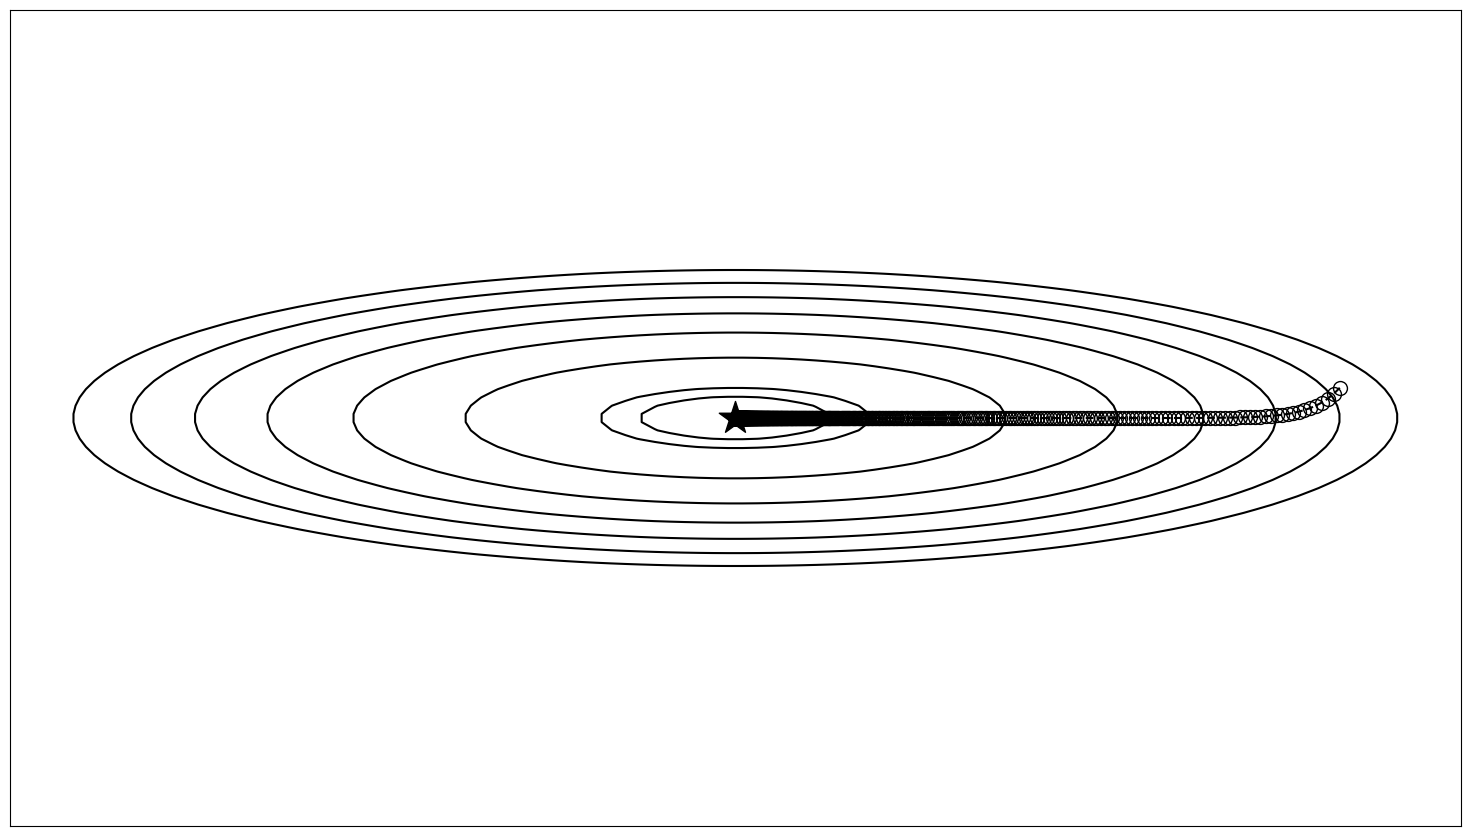

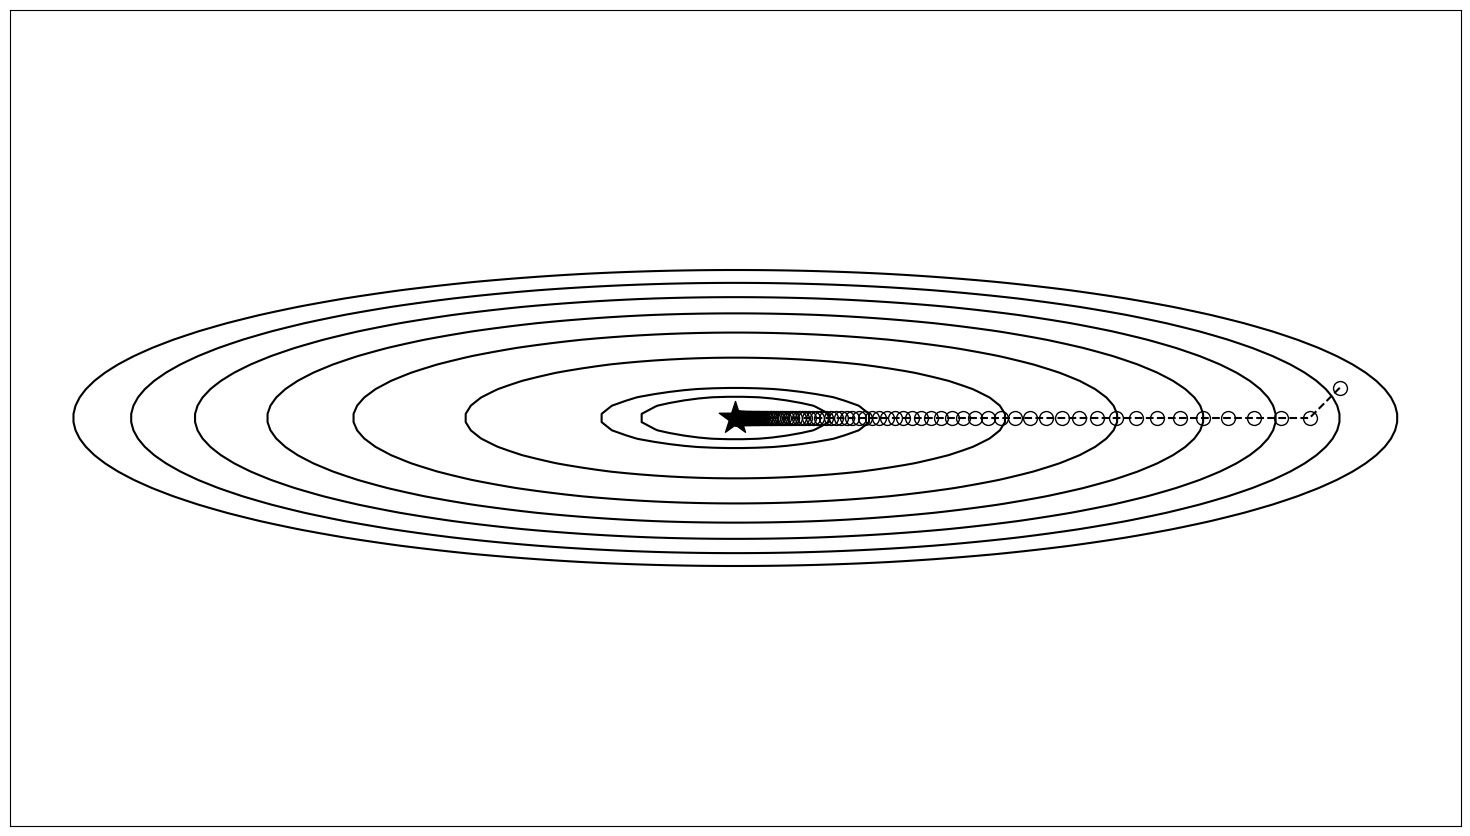

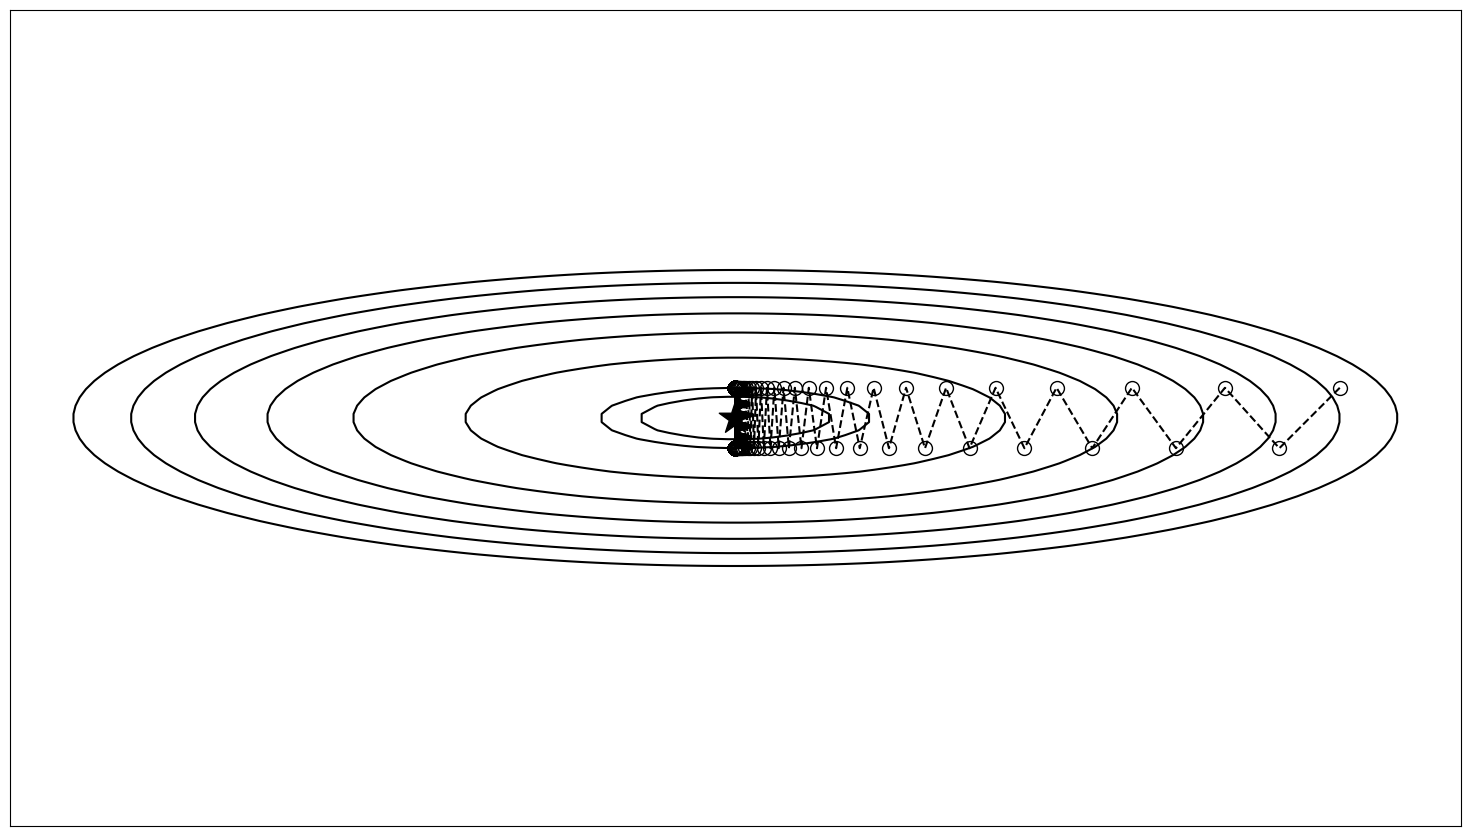

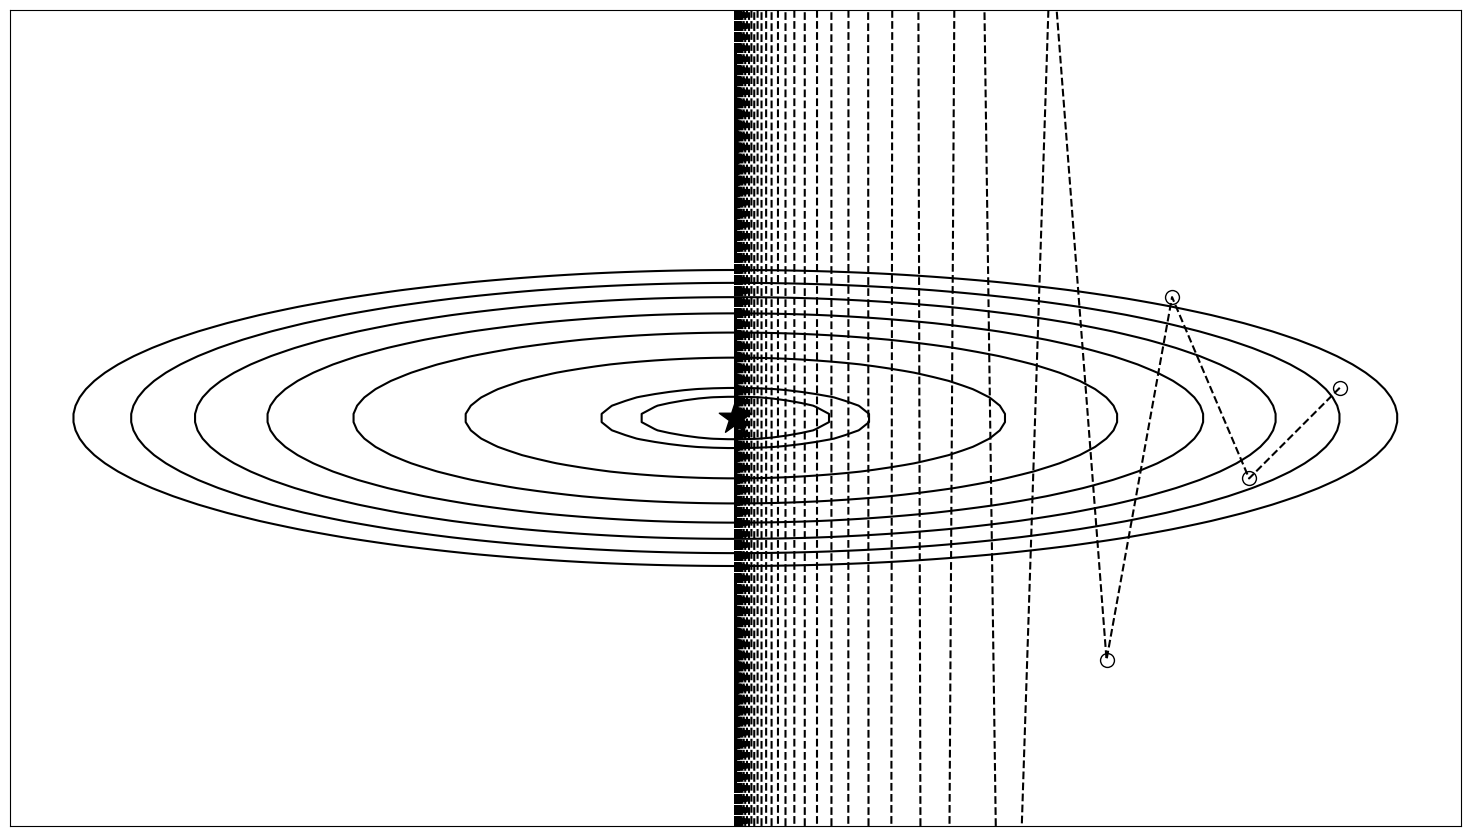

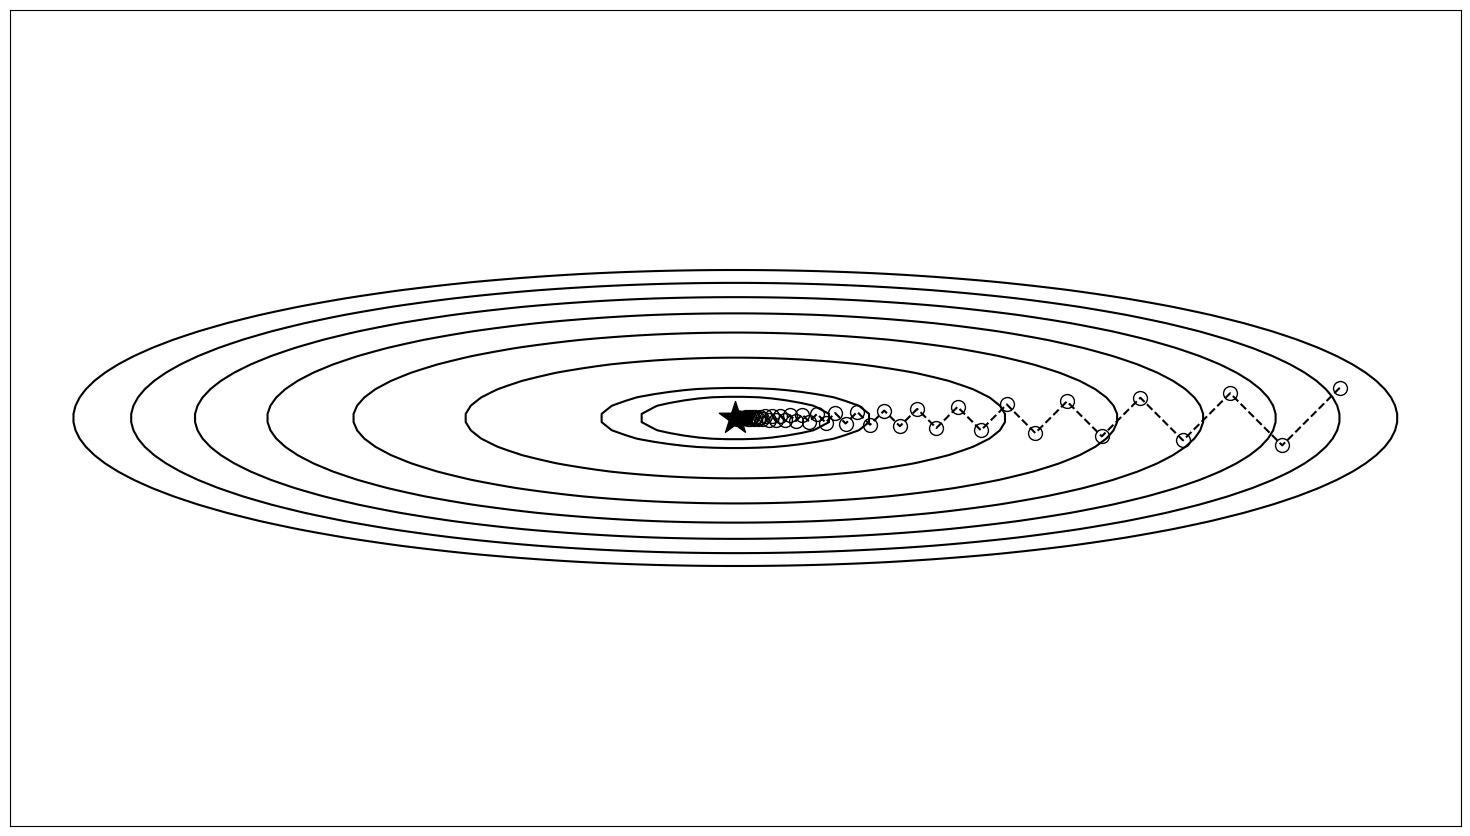

In [3]:
# Fixed step size
for t in [0.01, 0.05, 0.1, 0.15, 2 / (1 + 20)]:
    # Gradient descent
    x = np.array([gamma, 1])
    x_hist = [x]
    for k in range(1000):
        if np.linalg.norm(df(x)) < 1e-02:
            print("t = %.2e, converged in %d iterations" % (t, k))
            break
        dx = -df(x)
        #  x = line_search(x, dx)
        x = x + t * dx
        x_hist.append(x)

    # Plot
    fig, ax = plt.subplots(figsize=(16, 9))

    # Contour
    cs = plt.contour(X1, X2, f_vec(X1, X2), levels=[5, 10, 40, 80, 120, 160, 200, 240], colors='k')
    #  ax.clabel(cs, fontsize=18, inline=True)

    # Gradient descent
    ax.plot(*zip(*x_hist), linestyle='--', marker='o',
            markersize=10, markerfacecolor='none', color='k')

    # Optimal solution
    ax.scatter(*zip(x_star), marker='*', s=600, color='k')

    ax.set_xlim([x_min, x_max])
    ax.set_ylim([y_min, y_max])
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_aspect('equal', adjustable='box')
    plt.tight_layout()
    plt.savefig("gradient_descent_%.4f.pdf" % t)


Line search converged in 31 iterations


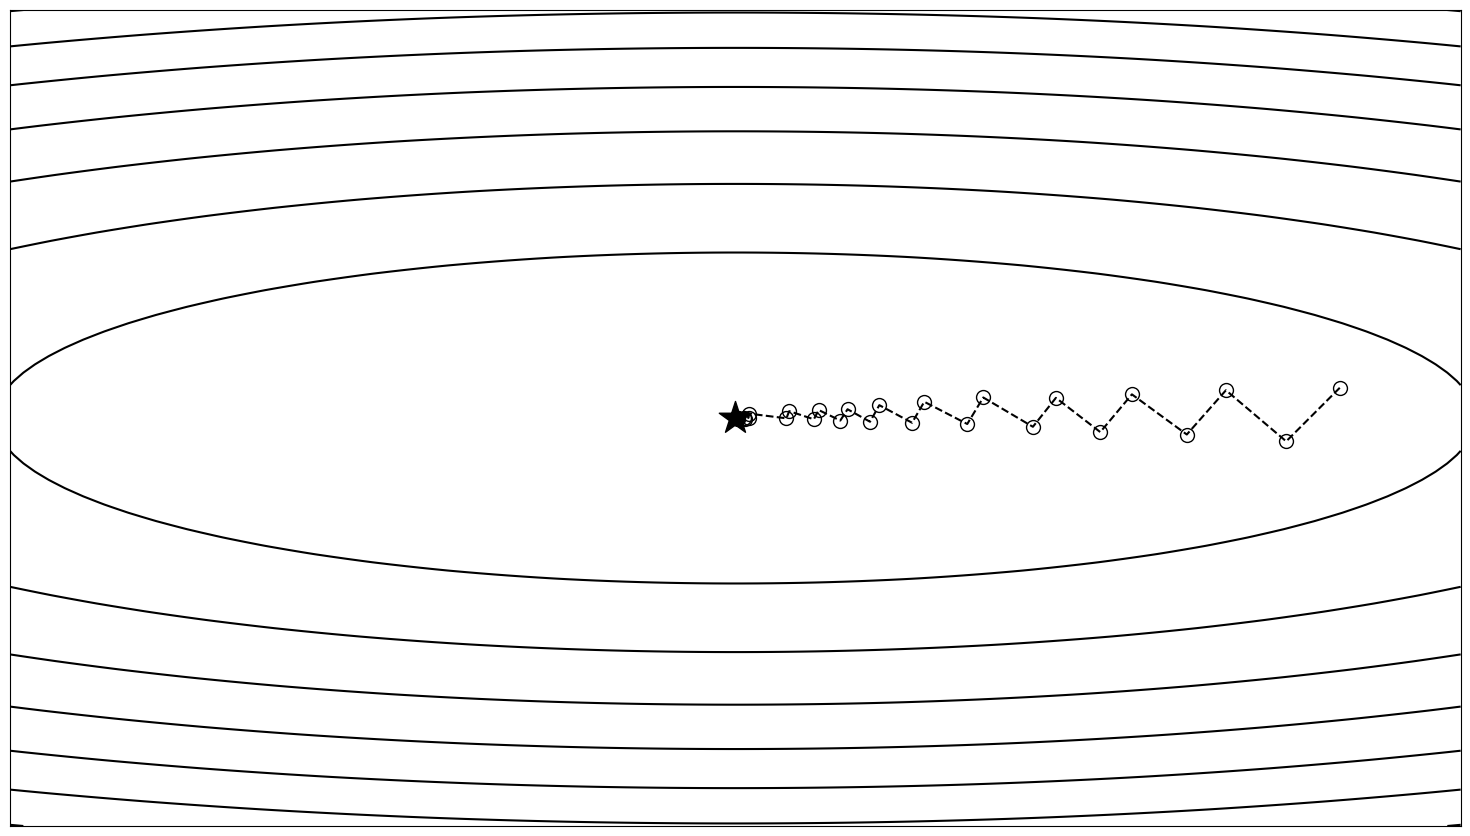

In [4]:
# Line search
def line_search(x, dx, alpha=0.5, beta=0.9):
    t = 1
    for k in range(200):
        f_next = f(x + t * dx)
        f_extrap = f(x) + alpha * t * df(x).T.dot(dx)
        if f_next <= f_extrap:
            return x + t * dx
        t *= beta


x = np.array([gamma, 1])
x_hist = [x]
for k in range(1000):
    if np.linalg.norm(df(x)) < 1e-02:
        print("Line search converged in %d iterations" % (k))
        break
    dx = -df(x)
    x = line_search(x, dx)
    x_hist.append(x)

# Plot
fig, ax = plt.subplots(figsize=(16, 9))

# Contour
cs = plt.contour(X1, X2, f_vec(X1, X2), colors='k')
#  ax.clabel(cs, fontsize=18, inline=True)

# Gradient descent
ax.plot(*zip(*x_hist), linestyle='--', marker='o',
        markersize=10, markerfacecolor='none', color='k')

# Optimal solution
ax.scatter(*zip(x_star), marker='*', s=600, color='k')

ax.set_xlim([x_min, x_max])
ax.set_ylim([y_min, y_max])
ax.set_xticks([])
ax.set_yticks([])
ax.set_aspect('equal', adjustable='box')
plt.tight_layout()
plt.savefig("gradient_descent_line_search.pdf")